In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [2]:
df = pd.read_csv('quikr_car.csv')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [3]:
df.shape

(892, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [5]:
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [6]:
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

### Data Cleaning

In [7]:
df.duplicated().sum()

94

In [8]:
# Remove Duplicates
df.drop_duplicates(inplace=True)

In [9]:
df['year'].unique()

array(['2007', '2006', '2018', '2014', '2015', '2012', '2013', '2016',
       '2010', '2017', '2008', '2011', '2019', '2009', '2005', '2000',
       '...', '150k', 'TOUR', '2003', 'r 15', '2004', 'Zest', '/-Rs',
       'sale', '1995', 'ara)', '2002', 'SELL', '2001', 'tion', 'odel',
       '2 bs', 'arry', 'Eon', 'o...', 'ture', 'emi', 'car', 'able', 'no.',
       'd...', 'SALE', 'digo', 'sell', 'd Ex', 'n...', 'e...', 'D...',
       ', Ac', 'go .', 'k...', 'o c4', 'zire', 'cent', 'Sumo', 'cab',
       't xe', 'EV2', 'r...', 'zest'], dtype=object)

In [10]:
df = df[df['year'].str.isnumeric()==True]
df.loc[:, 'year'] = df['year'].astype('int64')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [11]:
plt.figure(figsize=(15,5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [12]:
df.loc[:,'kms_driven'] = df['kms_driven'].str.split(' ').str.get(0).str.replace(',','')
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000,Diesel
...,...,...,...,...,...,...
886,Toyota Corolla Altis,Toyota,2009,"3,00,000",132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000",27000,Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000",40000,Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


In [13]:
not_numbers = df[df['kms_driven'].str.isnumeric()==False].index
not_numbers

Index([890, 891], dtype='int64')

In [14]:
df = df.drop(not_numbers)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000",50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000",30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000",132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000",27000,Diesel


In [15]:
df.dropna(subset=['kms_driven'],inplace=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000",45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000",28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000",36000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000",50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000",30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000",132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000",27000,Diesel


In [16]:
df['kms_driven'] = df['kms_driven'].astype('int64')

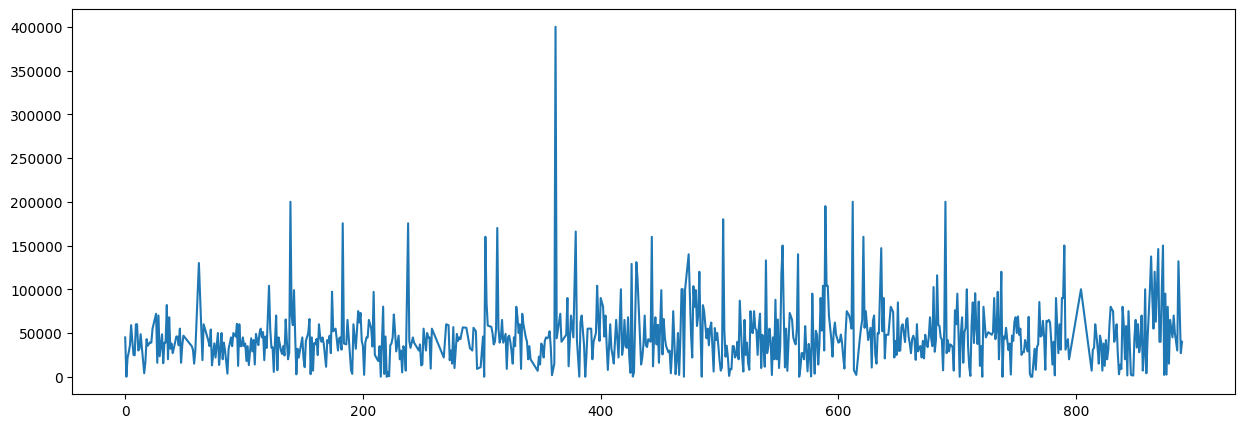

In [17]:
plt.figure(figsize=(15,5))
plt.plot(df['kms_driven'])

In [18]:
df = df[df['kms_driven']<=250000]

In [19]:
df.loc[:, 'Price'] = df['Price'].str.replace(',','')

In [20]:
prices = df.Price[df['Price'].str.isnumeric()==True].   astype('int64')
prices

0       80000
1      425000
3      325000
4      575000
6      175000
        ...  
883    270000
885    110000
886    300000
888    260000
889    390000
Name: Price, Length: 724, dtype: int64

In [21]:
prices.describe()

count    7.240000e+02
mean     4.032934e+05
std      4.802789e+05
min      3.000000e+04
25%      1.650000e+05
50%      2.900000e+05
75%      4.899990e+05
max      8.500003e+06
Name: Price, dtype: float64

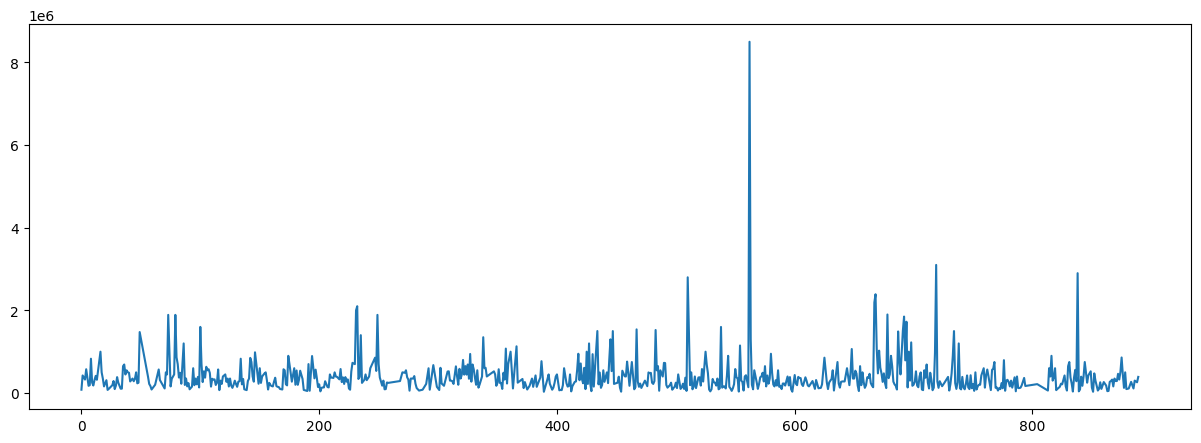

In [22]:
plt.figure(figsize=(15,5))
plt.plot(prices)

In [23]:
df = df.replace(df.Price[df['Price'].str.isnumeric()==False].values,round(prices.median()))
df.loc[:, 'Price'] = df['Price'].astype('int64')

C:\Users\abc\AppData\Local\Temp\ipykernel_4124\1101955072.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(df.Price[df['Price'].str.isnumeric()==False].values,round(prices.median()))


In [24]:
df = df[df['Price']<=6e6]

In [25]:
df.dropna(subset=['fuel_type'],inplace=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,290000,22000,Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
886,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
888,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [26]:
names = df['name']
names = names.str.split().str.slice(0,3).str.join(' ')
df['name'] = names

In [27]:
df.reset_index(drop=True,inplace=True)
df

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Maruti Suzuki Alto,Maruti,2018,290000,22000,Petrol
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
...,...,...,...,...,...,...
738,Maruti Suzuki Ritz,Maruti,2011,270000,50000,Petrol
739,Tata Indica V2,Tata,2009,110000,30000,Diesel
740,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
741,Tata Zest XM,Tata,2018,260000,27000,Diesel


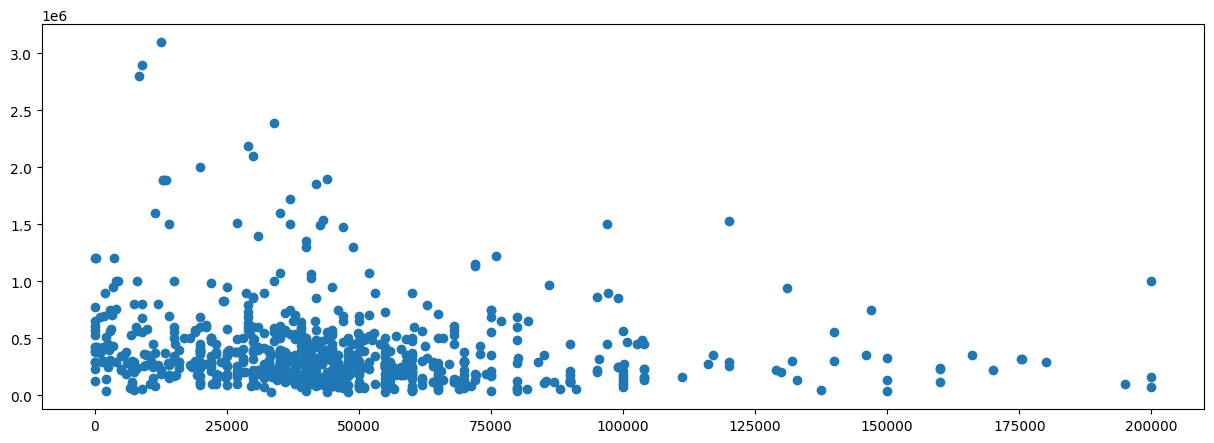

In [28]:
plt.figure(figsize=(15,5))
plt.scatter(df['kms_driven'],df['Price'])
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 743 entries, 0 to 742
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        743 non-null    object
 1   company     743 non-null    object
 2   year        743 non-null    int64 
 3   Price       743 non-null    object
 4   kms_driven  743 non-null    int64 
 5   fuel_type   743 non-null    object
dtypes: int64(2), object(4)
memory usage: 35.0+ KB


In [30]:
df.describe()

,year,kms_driven
count,743.000000,743.000000
mean,2012.403769,46032.219381
std,4.153534,32313.766861
min,1995.000000,0.000000
25%,2010.000000,27000.000000
50%,2013.000000,41000.000000
75%,2015.000000,58279.500000
max,2019.000000,200000.000000


### Prediction

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [32]:
X = df[['name','company','year','kms_driven','fuel_type']]
Y = df[['Price']]

In [33]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=35)

In [34]:
ohe = OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

In [35]:
col_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),remainder="passthrough")

In [36]:
col_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder',
                                 OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat Diesel',
       'Chevrolet Beat LS', 'Chevrolet B...
       'Volkswagen Vento Konekt', 'Volvo S80 Summum'], dtype=object),
                                                           array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                           array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                 ['name', 'company', 'fuel_type'])])

In [37]:
lr = LinearRegression()

In [38]:
pipe = make_pipeline(col_trans,lr)

In [39]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet', 'Audi A4 1.8', 'Audi A4 2.0', 'Audi A6 2.0',
       'Audi A8', 'Audi Q3 2.0', 'Audi Q5 2.0', 'Audi Q7', 'BMW 3 Series',
       'BMW 5 Series', 'BMW 7 Series', 'BMW X1', 'BMW X1 sDrive20d',
       'BMW X1 xDrive20d', 'Chevrolet Beat', 'Chevrolet Beat...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [40]:
y_pred = pipe.predict(x_text)

In [41]:
r2_score(y_test,y_pred)

0.7095373797515304